In [55]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

sys.path.insert(1, "../src")
from Loess import *

In [56]:
df = pd.read_csv("datasets/dataset.csv")

xx = df[["radiation", "temperature", "wind"]].to_numpy()
yy = df["ozone"].to_numpy()

loess = Loess(xx, yy)

In [57]:
a=np.random.rand(500,3)
a = a * (xx.max(axis=0) - xx.min(axis=0)) + xx.min(axis=0)

In [58]:
res = []

for vec in a:
    res.append(loess.estimate(vec, 5, degree=2))
    
res

[137.83252904653781,
 132.17546921567103,
 16.506734741289055,
 -7.345946330977101,
 17.65470288157251,
 53.58825583790271,
 91.6885755052535,
 3.279528083076658,
 54.28309645244521,
 56.83416703227624,
 11.467824287294151,
 13.067139772096583,
 134.58061735550615,
 15.324272108246461,
 42.27716397182976,
 7.232371409438302,
 61.99685450575895,
 39.88099064558517,
 179.84592819313585,
 49.43491559054159,
 69.77977374830775,
 24.310603455746083,
 10.337963232597945,
 75.68413273822074,
 30.50377093930634,
 -54.10344960155736,
 10.045610724412265,
 113.58387417935279,
 96.95403365731187,
 27.41651153688162,
 46.15599835842963,
 -4.730531240733956,
 32.74443961531399,
 33.74943040197372,
 69.86726483451989,
 29.765696145241325,
 58.257996589547346,
 9.18797764262234,
 37.578450711020274,
 51.23733626298679,
 82.09835889786974,
 5.825291249264334,
 1.09120490638453,
 21.734373925076945,
 20.810556007294636,
 18.846755680227602,
 -8.704847726412744,
 55.22817419644073,
 64.00724837765804,
 

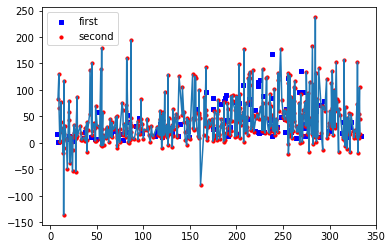

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

rad_in = a[:, 0]
yhat = np.array(res)[np.argsort(rad_in)]

ax1.scatter(df["radiation"].to_numpy(), yy, s=10, c='b', marker="s", label='first')
ax1.scatter(rad_in, res, s=10, c='r', marker="o", label='second')
ax1.plot(np.sort(rad_in), yhat)
plt.legend(loc='upper left');
plt.show()

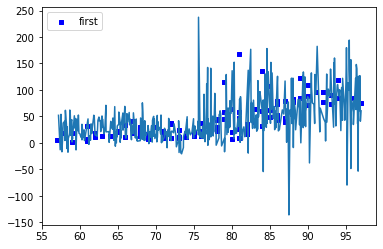

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

temp_in = a[:, 1]

yhat = np.array(res)[np.argsort(temp_in)]

ax1.scatter(df["temperature"].to_numpy(), yy, s=10, c='b', marker="s", label='first')
# ax1.scatter(temp_in, res, s=10, c='r', marker="o", label='second')
ax1.plot(np.sort(temp_in), yhat)
plt.legend(loc='upper left');
plt.show()

In [61]:
import plotly.express as px

df_obs = pd.DataFrame(a[:, [0, 1, 2]], columns = ['radiation', 'temperature', 'wind'])
df_obs['ozone'] = res

fig = px.scatter_3d(df, x='radiation', y='temperature', z='wind', color='ozone')
fig.write_html("./file.html")
fig.show()

In [62]:
df_obs = pd.DataFrame(a[:, [0, 1, 2]], columns = ['radiation', 'temperature', 'wind'])
df_obs['ozone'] = res

fig = px.scatter_3d(df_obs, x='radiation', y='temperature', z='wind', color='ozone')
fig.write_html("./file2.html")
fig.show()

In [7]:
np.array([1,2,3,4,5])[[2,1]]

array([3, 2])

In [8]:
def get_min_range(distances, window):
    min_idx = np.argmin(distances)
    n = len(distances)
    if min_idx == 0:
        return np.arange(0, window)
    if min_idx == n-1:
        return np.arange(n - window, n)

    min_range = [min_idx]
    while len(min_range) < window:
        i0 = min_range[0]
        i1 = min_range[-1]
        if i0 == 0:
            min_range.append(i1 + 1)
        elif i1 == n-1:
            min_range.insert(0, i0 - 1)
        elif distances[i0-1] < distances[i1+1]:
            min_range.insert(0, i0 - 1)
        else:
            min_range.append(i1 + 1)
    return np.array(min_range)

In [16]:
get_min_range([3,0,4,5,1], 2)

array([0, 1])

In [107]:
def add_polynomial_features(X, degree):
    B = np.ones((X.shape[0], 1))
    B = np.concatenate((B, X), axis=1)
    for d in range(2, degree+1):
        A = X ** d
        B = np.concatenate((B, A), axis=1)
        
    return B

In [109]:
xcf = np.array([[1,2,3], [4,5,6]])

add_polynomial_features(xcf, 3)

array([[  1.,   1.,   2.,   3.,   1.,   4.,   9.,   1.,   8.,  27.],
       [  1.,   4.,   5.,   6.,  16.,  25.,  36.,  64., 125., 216.]])

In [103]:
B = np.ones((xcf.shape[0], 1))
np.concatenate((B, xcf), axis=1)

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])